# Laboratorio 1 - Parte 1

### Regresión polinomial múltiple

### Universidad de Antioquia

### Facultad de Ingeniería

### Ingeniería de Sistemas

### Ude@ - 2018-I

#### Profesor: Antonio Tamayo Herrera


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

## Ejercicio 1

A continuación se define la función sigmoidal. En la parte del código dónde está el comentario (Complete ...) debe escribir el código que permita calcular la salida de dicha función. Es decir, escriba una función en Python para la siguiente función matemática:

$$ g(z) = \frac{1}{1+e^{-z}} $$

Realice la gráfica de la función sigmoidal para valores de $z$ entre $-5$ y $5$. La gráfica debe tener título y los correspondientes nombres de los ejes.

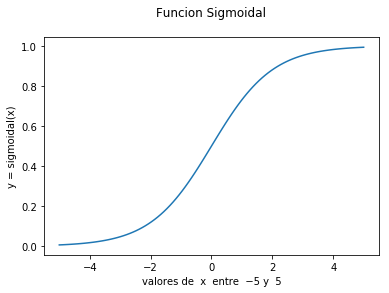

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

#Sigmoidal
def sigmoidal(z):
    
    #Complete la siguiente línea con el código para calcular la salida de la función sigmoidal
    s = 1/(1+np.exp(-z)) 
    
    #Complete el código para realizar la gráfica de la función aquí
    
    plt.plot(z,s)
    plt.ylabel('y = sigmoidal(x)')
    plt.xlabel('valores de  x  entre  −5 y  5')
    plt.title(u'Funcion Sigmoidal\n')
    plt.show()
    
    return s


x = np.linspace(-5,5,100)
result=sigmoidal(x)



## Ejercicio 2

Analice los siguientes métodos a la luz de la teoría vista para los modelos de regresión polinomial múltiple. Una vez comprenda su funcionamiento, proceda a completar el código del método de gradiente descendente para el problema de regresión. En este método se le pide escribir el código de la regla de actualización de los parámetros del algorítmo de gradiente descedente: 

$$w_j(iter) = w_j(iter-1) - \eta \frac{\partial E(w)}{\partial w_j}$$ 

y además se pide graficar el error cuadrático 
medio (ECM) vs. las iteraciones del algorítmo. La gráfica debe llevar título y los correspondientes nombres de los ejes.

In [10]:
#Error cuadrático medio (criterio para el modelo de regresión polinomial)
def ECM(Y_est,Y):
    N = np.size(Y)
    ecm = sum((Y_est - Y)**2)/(2*N)
    return ecm 

#Modelo Regresión Múltiple
def regression(X, W):
    Yest = np.dot(X,W)    #con np.dot se realiza el producto matricial. Aquí X es dim [Nxd] y W es dim [dx1]
    return Yest           #Esta variable contiene la salida de f(X,W)


#Potencia de polinomio
def potenciaPolinomio(X,grado):
    X2 = X
    
    if grado != 1:
        for i in range(2,grado+1):
            Xadd = X**i
            X2 = np.concatenate((X2, Xadd), axis=1)
    
    return X2

    
#Gradiente descendente para regresión lineal múltiple
def gradiente_descendente(X,Y,grado,eta):
    
    #Se modifica la matriz de datos original de acuerdo al grado del polinomio ingresado para el modelo
    X = potenciaPolinomio(X,grado)
    
    #X es la matriz de datos extendida. W es el vector de parámetros del modelo
    #Extendemos la matriz
    unos = np.array([np.ones(np.size(X,0))])
    #Concatenamos el vector de unos con la matriz X
    X = np.concatenate((unos.T, X), axis=1)
    X = X.reshape(np.size(X,0),np.size(X,1))
    
    Y = Y.reshape(np.size(Y), 1)
    
    #Tomamos el número de variables del problema
    d = np.size(X,1)
    
    #Tomamos el número de muestras de la base de datos
    N = np.size(X,0)
    
    #Inicializamos el vector de parámetros aleatoriamente
    Want = np.random.randn(d)
    Want = Want.reshape(np.size(Want),1)
    
    eta = eta
    
    iteraciones = 500
    ecms = np.zeros(iteraciones)
    
    for iter in range(iteraciones):
        
        error = ECM(regression(X,Want),Y)
        ecms[iter] = error
        
        #Aquí debe completar el código con la regla de actualización de los parámetros W. Tenga en cuenta
        #los nombres de las variables ya creadas: Want, X, Y
        
    print 'Vector de parámetros del modelo:\n'
    print W
    print '\nError Final = ' + str(ecms[-1])
    
    #Aquí debe completar el código para realizar la gráfica de ecms vs. iteraciones
    
    plt.show()
    
    return W
    

## Ejercicio 3

A continuación, se leen los datos de un problema de regresión que consiste en predecir el valor de la humedad absoluta en el aire, a partir de varias variables sensadas en el aire (Para más información sobre la base de datos, consulte: https://archive.ics.uci.edu/ml/datasets/Air+Quality). Las variables o caracterísicas son guardadas en la variable X que posteriormente es normalizada y la variable de salida o variable a predecir es guardada en la variable Y. Complete el código llamando a la función gradiente_descendente y pasandole los parámetros correspondientes. Debe obtener como salída el vector de parámetros W estimado y la gráfica del error cuadrático medio vs iteraciones.

In [11]:
from sklearn.preprocessing import normalize

#cargamos la bd que está en un archivo .data y ahora la podemos manejar de forma matricial
db = np.loadtxt('DB/AirQuality.data',delimiter='\t')  # Assuming tab-delimiter

#Esta es la base de datos AirQuality del UCI Machine Learning Repository. En la siguiente URL se encuentra toda
#la descripción de la base de datos y la contextualización del problema.
#https://archive.ics.uci.edu/ml/datasets/Air+Quality#

X = db[:,0:12]
Y = db[:,12]

#Normalizamos los datos
X = normalize(X, axis=0, norm='l1')

eta = 0.00001
#eta = 0.001
#eta = 0.1

#Complete la siguiente línea de código llamando el método gradiente_descendente con sus respectivos argumentos
#W = 

3.1 Cuántas muestras tiene la base de datos?

3.2 Cuántas caracteristicas tiene el problema?

3.3 Cuál es el número de coeficientes w que se obtienen al ingresar un polinomio de grado 4? por qué?

3.4 La funci&oacute;n polin&oacute;mica que se est&aacute; usando para grados mayores a 1
est&aacute; incompleta, ¿por qu&eacute;?

Responda aquí:

3.1 R/: 

3.2 R/: 

3.3 R/:

3.4 R/:


## Ejercicio 4

Identifique la variable "eta" (tasa de aprendizaje $\eta$) en el código anterior, cambie su valor de acuerdo a la siguiente tabla. Haga lo mismo con el valor del grado del polinomio y complete la columna ECM.

<table>
  <tr>
    <th>Tasa de aprendizaje</th>
    <th>Grado del polinomio</th>
    <th>Error Cuadrático Medio (ECM)</th>
  </tr>
  <tr>
    <td></td>
    <td>1</td>
    <td>782.65</td>
  </tr> 
  <tr>
    <td></td>
    <td>2</td>
    <td></td>
  </tr>
  <tr>
    <td>0.00001</td>
    <td>3</td>
    <td></td>
  </tr>
  <tr>
    <td></td>
    <td>4</td>
    <td></td>
  </tr>
  <tr>
    <td></td>
    <td>5</td>
    <td></td>
  </tr>
    
 <tr>
    <td></td>
    <td>1</td>
    <td></td>
  </tr> 
  <tr>
    <td></td>
    <td>2</td>
    <td></td>
  </tr>
  <tr>
    <td>0.001</td>
    <td>3</td>
    <td></td>
  </tr>
  <tr>
    <td></td>
    <td>4</td>
    <td></td>
  </tr>
  <tr>
    <td></td>
    <td>5</td>
    <td></td>
  </tr>
  
  <tr>
    <td></td>
    <td>1</td>
    <td></td>
  </tr> 
  <tr>
    <td></td>
    <td>2</td>
    <td></td>
  </tr>
  <tr>
    <td>0.1</td>
    <td>3</td>
    <td></td>
  </tr>
  <tr>
    <td></td>
    <td>4</td>
    <td></td>
  </tr>
  <tr>
    <td></td>
    <td>5</td>
    <td></td>
  </tr>
</table>



Tenga en cuenta que cuando el valor de $\eta$ sea $0.00001$ y el grado del polinomio sea $1$, el valor del ECM debe ser $782.65$. Esto le servirá de criterio de verificación para la implementación de su algorítmo de gradiente descendente.


## Ejercicio 4

En la celda de código del ejercicio 3, comente la línea donde se normaliza la matriz de datos X. Verifique que valor de la tasa de aprendizaje $\eta$ está en $0.0001$ en el método de gradiente_descendente. Vuelva a correr el código del ejercicio 3 y observe que pasa con el ECM.

4.1 Qué sucede con los valores del ECM?

4.2 A qué se debe lo que observa?

4.3 ¿Qu&eacute; proceso hace la normalizaci&oacute;n sobre los datos? Consulte por qu&eacute; es necesaria la normalizaci&oacute;n en el modelo de regresi&oacute;n log&iacute;stica y cu&aacute;les son los tipos de normalizaci&oacute;n m&aacute;s comunes. ¿Cu&aacute;l de ellos se aplic&oacute; en el laboratorio?

Responda aquí:

4.1 R/: 

4.2 R/: 

4.3 R/:
